In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from sklearn import metrics

%matplotlib inline


# Confusion Matrix - A simple example

## Prepare the data

In [435]:
# will use the iris data, but in different context - more clear for CM:
iris = datasets.load_iris()

# start and end values for row indexes to take data from:
start = 80
end = 110

In [439]:
df = pd.DataFrame(data={
    'x1': iris.data[start:end,0],
    'x2': iris.data[start:end,1],
    'y':iris.target[start:end]})

print(f'df.shape: {df.shape}')

### sustitute class 1 => 0, class 2 = > 1

# with map and lambda - useful for more complicated cases
# df.y = df.y.map( lambda x: 0 if x==1 else 1)

# map can also accept disctionary
df.y = df.y.map( {1: 0, 2:1})
print(f'y unique values: {np.unique(df.y, return_counts=True)}')



df.shape: (30, 3)
y unique values: (array([0, 1]), array([20, 10]))


In [427]:
# class names:
class_names = ['non-terorist', 'terorist']

## Visualize the data

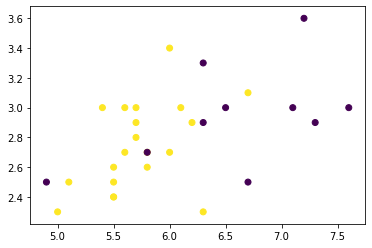

In [433]:
# df.plot.scatter('x1', 'x2', c='y', colormap='viridis')
plt.scatter(x=X[:,0], y=X[:,1],c=y, cmap='viridis')

## Separate the training data from the test data

In [382]:
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df.y, test_size=0.3, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

# X_train = X_test = df[['x1','x2']]
# y_train=y_test = df.y

X_train shape: (21, 2)
X_test shape: (9, 2)


## Choose and Train the model

We will use 2 classifiers, in order to compare the CM:

- a Dummy one, which always will predict one class only
- a CVM classifier

In [383]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression

In [384]:
dummy = DummyClassifier(strategy="constant", constant=0)
svc = SVC(kernel="linear", C=12)
lr = LogisticRegression(random_state=0)

In [385]:
dummy_y_pred = dummy.fit(X_train, y_train).predict(X_test)
svc_y_pred = svc.fit(X_train, y_train).predict(X_test)
lr_y_pred = lr.fit(X_train, y_train).predict(X_test)

In [386]:
max(y_test.mean(), 1 - y_test.mean())

0.5555555555555556

## Evaluating the Model

### Classifier Accuracy Score

In [1]:
# Model Accuracy: 
print("Dummy Accuracy:",metrics.accuracy_score(y_test, dummy_y_pred))
print("SVC Accuracy:",metrics.accuracy_score(y_test, svc_y_pred))
print("LR Accuracy:",metrics.accuracy_score(y_test, lr_y_pred))

NameError: name 'metrics' is not defined

### Confusion Matrix - Precision and Recall

<img src="../../images/confusion_matrix.png">

In [388]:
# Model Precision:
print("Dummy Precision:",metrics.precision_score(y_test, dummy_y_pred))
print("SVC Precision:",metrics.precision_score(y_test, svc_y_pred))
print("LR Precision:",metrics.precision_score(y_test, lr_y_pred))

Dummy Precision: 0.0
SVC Precision: 1.0
LR Precision: 0.0


In [389]:
# Model Recall: 
print("Dummy Recall:",metrics.recall_score(y_test, dummy_y_pred))
print("SVC Recall:",metrics.recall_score(y_test, svc_y_pred))
print("LR Recall:",metrics.recall_score(y_test, svc_y_pred))

Dummy Recall: 0.0
SVC Recall: 0.25
LR Recall: 0.25


In [390]:
print(metrics.confusion_matrix(y_test, svc_y_pred))

[[5 0]
 [3 1]]


In [400]:
print(y_test)
type(y_test)

27    1
15    0
23    1
17    0
8     0
9     0
28    1
24    1
12    0
Name: y, dtype: int64


AttributeError: 'Series' object has no attribute 'Transpose'